# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Ruangguru_1.csv")
df.head()

,userName,score,at,content
0,TEGAR KBM DONG,1,2024-05-10 14:50:54,Pelajar yg mencari jawaban pertanyaan di persu...
1,Kar Sini,1,2024-05-10 10:06:20,Masa aku di telfon terus di suruh bayar 25jt g...
2,Arrafi Lucky,1,2024-05-10 07:26:52,Drill soalnya lemot
3,Marfen Setiabudi,1,2024-05-10 03:39:13,materi belajar terlalu bertele-tele
4,Ela Nurlaela,5,2024-05-10 00:18:02,Mantap


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Pelajar yg mencari jawaban pertanyaan di persu...,TEGAR KBM DONG,2024-05-10 14:50:54
1,Masa aku di telfon terus di suruh bayar 25jt g...,Kar Sini,2024-05-10 10:06:20
2,Drill soalnya lemot,Arrafi Lucky,2024-05-10 07:26:52
3,materi belajar terlalu bertele-tele,Marfen Setiabudi,2024-05-10 03:39:13
4,Mantap,Ela Nurlaela,2024-05-10 00:18:02
...,...,...,...
791,Ayo ke quipper,Muhammad Zainul Murod,2024-01-11 04:33:39
792,Ruang riung,Vynss Gitss,2024-01-11 01:28:26
793,Ruang Riung,Pes Bandung,2024-01-11 01:25:33
794,Aplikasi ini tidak bisa dibuka coba di lihat d...,Naira Nabila,2024-01-10 22:51:50


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   796 non-null    object
 1   userName  796 non-null    object
 2   at        796 non-null    object
dtypes: object(3)
memory usage: 18.8+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,796,796,796
unique,721,794,796
top,Bagus,Winnie Natasha,2024-05-10 14:50:54
freq,27,2,1


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(796, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(721, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,pelajar yg mencari jawaban pertanyaan di persu...,TEGAR KBM DONG,2024-05-10 14:50:54
1,masa aku di telfon terus di suruh bayar jt gak...,Kar Sini,2024-05-10 10:06:20
2,drill soalnya lemot,Arrafi Lucky,2024-05-10 07:26:52
3,materi belajar terlalu berteletele,Marfen Setiabudi,2024-05-10 03:39:13
4,mantap,Ela Nurlaela,2024-05-10 00:18:02
...,...,...,...
791,ayo ke quipper,Muhammad Zainul Murod,2024-01-11 04:33:39
792,ruang riung,Vynss Gitss,2024-01-11 01:28:26
793,ruang riung,Pes Bandung,2024-01-11 01:25:33
794,aplikasi ini tidak bisa dibuka coba di lihat d...,Naira Nabila,2024-01-10 22:51:50


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [15]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,pelajar yang mencari jawaban pertanyaan di per...,TEGAR KBM DONG,2024-05-10 14:50:54
1,masa aku di telfon terus di suruh bayar jt tid...,Kar Sini,2024-05-10 10:06:20
2,drill soalnya lemot,Arrafi Lucky,2024-05-10 07:26:52
3,materi belajar terlalu berteletele,Marfen Setiabudi,2024-05-10 03:39:13
4,mantap,Ela Nurlaela,2024-05-10 00:18:02
...,...,...,...
791,ayo ke quipper,Muhammad Zainul Murod,2024-01-11 04:33:39
792,ruang riung,Vynss Gitss,2024-01-11 01:28:26
793,ruang riung,Pes Bandung,2024-01-11 01:25:33
794,aplikasi ini tidak bisa dibuka coba di lihat d...,Naira Nabila,2024-01-10 22:51:50


In [16]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [17]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,pelajar mencari jawaban pertanyaan persulit gi...,TEGAR KBM DONG,2024-05-10 14:50:54
1,masa aku telfon terus suruh bayar jt manuk aka...,Kar Sini,2024-05-10 10:06:20
2,drill soalnya lemot,Arrafi Lucky,2024-05-10 07:26:52
3,materi belajar terlalu berteletele,Marfen Setiabudi,2024-05-10 03:39:13
4,mantap,Ela Nurlaela,2024-05-10 00:18:02
...,...,...,...
791,ayo quipper,Muhammad Zainul Murod,2024-01-11 04:33:39
792,ruang riung,Vynss Gitss,2024-01-11 01:28:26
793,ruang riung,Pes Bandung,2024-01-11 01:25:33
794,aplikasi tidak dibuka coba lihat dulu mungkin ...,Naira Nabila,2024-01-10 22:51:50


In [18]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0      [pelajar, mencari, jawaban, pertanyaan, persul...
1      [masa, aku, telfon, terus, suruh, bayar, jt, m...
2                                [drill, soalnya, lemot]
3                [materi, belajar, terlalu, berteletele]
4                                               [mantap]
                             ...                        
791                                       [ayo, quipper]
792                                       [ruang, riung]
793                                       [ruang, riung]
794    [aplikasi, tidak, dibuka, coba, lihat, dulu, m...
795                       [wow, aplikasi, sangat, bagus]
Name: content, Length: 721, dtype: object

In [19]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Ruangguru_1.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Ruangguru_1.csv', encoding = 'latin1')
df_clean

,content
0,ajar cari jawab tanya sulit gimana cara ajar b...
1,masa aku telfon terus suruh bayar jt manuk aka...
2,drill soal lot
3,materi ajar terlalu berteletele
4,mantap
...,...
716,ayo quipper
717,ruang riung
718,ruang riung
719,aplikasi tidak buka coba lihat dulu mungkin ya...


# **Translate**

In [21]:
# # Menginstall Library easynmt
# !pip install -U easynmt

In [22]:
# import pandas as pd
# from easynmt import EasyNMT

In [23]:
# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Ruangguru_1.csv', encoding='latin1')

In [24]:
# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [25]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [26]:
# df2 = df_clean.fillna(method = 'pad')
# df2

In [27]:
# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Ruangguru_1.csv')

In [28]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Ruangguru_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,ajar cari jawab tanya sulit gimana cara ajar b...,"fontcolor="" # FFFF00""eachingansight fontcolor=..."
1,1,masa aku telfon terus suruh bayar jt manuk aka...,"When I call, you keep telling me to pay."
2,2,drill soal lot,drill about lot
3,3,materi ajar terlalu berteletele,The teaching material is too beat-up.
4,4,mantap,Steady.
...,...,...,...
716,716,ayo quipper,"Come on, quipper."
717,717,ruang riung,rifling space
718,718,ruang riung,rifling space
719,719,aplikasi tidak buka coba lihat dulu mungkin ya...,The application does not open. Check it out fi...


# **Labeling**

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Ruangguru_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,ajar cari jawab tanya sulit gimana cara ajar b...,"fontcolor="" # FFFF00""eachingansight fontcolor=..."
1,1,masa aku telfon terus suruh bayar jt manuk aka...,"When I call, you keep telling me to pay."
2,2,drill soal lot,drill about lot
3,3,materi ajar terlalu berteletele,The teaching material is too beat-up.
4,4,mantap,Steady.
...,...,...,...
716,716,ayo quipper,"Come on, quipper."
717,717,ruang riung,rifling space
718,718,ruang riung,rifling space
719,719,aplikasi tidak buka coba lihat dulu mungkin ya...,The application does not open. Check it out fi...


In [30]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [31]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 435
Netral = 218
Negatif = 68

Total Data Seluruhnya : 721


In [33]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,ajar cari jawab tanya sulit gimana cara ajar b...,"fontcolor="" # FFFF00""eachingansight fontcolor=...",Positif
1,1,masa aku telfon terus suruh bayar jt manuk aka...,"When I call, you keep telling me to pay.",Netral
2,2,drill soal lot,drill about lot,Netral
3,3,materi ajar terlalu berteletele,The teaching material is too beat-up.,Netral
4,4,mantap,Steady.,Positif
...,...,...,...,...
716,716,ayo quipper,"Come on, quipper.",Netral
717,717,ruang riung,rifling space,Netral
718,718,ruang riung,rifling space,Netral
719,719,aplikasi tidak buka coba lihat dulu mungkin ya...,The application does not open. Check it out fi...,Negatif


In [34]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,ajar cari jawab tanya sulit gimana cara ajar b...,"fontcolor="" # FFFF00""eachingansight fontcolor=...",Positif
1,masa aku telfon terus suruh bayar jt manuk aka...,"When I call, you keep telling me to pay.",Netral
2,drill soal lot,drill about lot,Netral
3,materi ajar terlalu berteletele,The teaching material is too beat-up.,Netral
4,mantap,Steady.,Positif
...,...,...,...
716,ayo quipper,"Come on, quipper.",Netral
717,ruang riung,rifling space,Netral
718,ruang riung,rifling space,Netral
719,aplikasi tidak buka coba lihat dulu mungkin ya...,The application does not open. Check it out fi...,Negatif


# **Visualisasi**


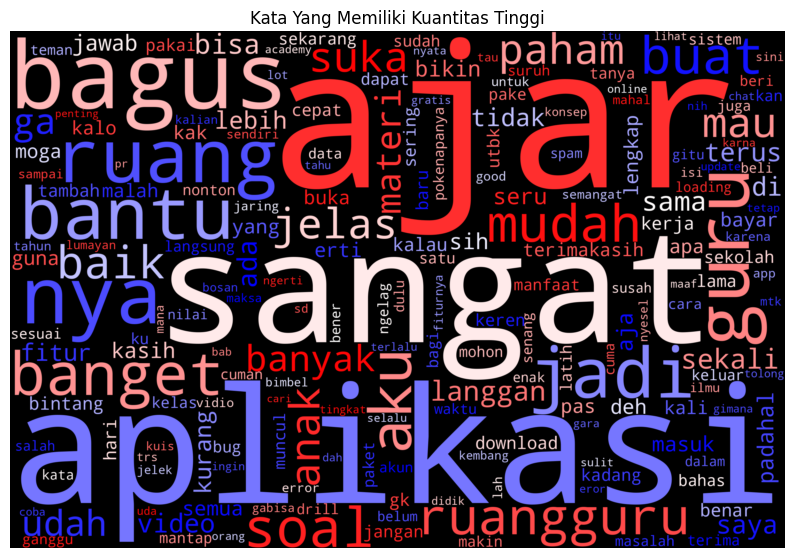

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


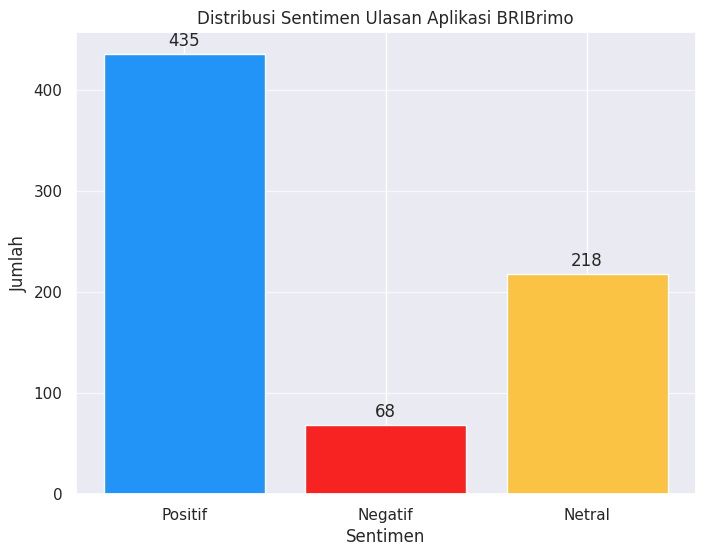

In [36]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi BRIBrimo")


In [37]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,ajar cari jawab tanya sulit gimana cara ajar b...,"fontcolor="" # FFFF00""eachingansight fontcolor=...",Positif
4,mantap,Steady.,Positif
6,sangat manfaat,very useful,Positif
9,bagus banget materi lengkap terus seru cara aj...,Very good. Complete material. Keeps exciting.,Positif
10,bagus,Good.,Positif
...,...,...,...
712,maaf beri bintang masuk login misalsaya mau ma...,I'm sorry. Give the star login. I'd like to lo...,Negatif
713,bagus begetee,Good begetee,Positif
715,alhamdulilah bnyk bngt maju buat anak belajars...,"fontcolor="" # FFFF00""alhamduldilah fontcolor=""...",Positif
719,aplikasi tidak buka coba lihat dulu mungkin ya...,The application does not open. Check it out fi...,Negatif


In [38]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
0,ajar cari jawab tanya sulit gimana cara ajar b...,"fontcolor="" # FFFF00""eachingansight fontcolor=...",1
4,mantap,Steady.,1
6,sangat manfaat,very useful,1
9,bagus banget materi lengkap terus seru cara aj...,Very good. Complete material. Keeps exciting.,1
10,bagus,Good.,1
...,...,...,...
712,maaf beri bintang masuk login misalsaya mau ma...,I'm sorry. Give the star login. I'd like to lo...,0
713,bagus begetee,Good begetee,1
715,alhamdulilah bnyk bngt maju buat anak belajars...,"fontcolor="" # FFFF00""alhamduldilah fontcolor=""...",1
719,aplikasi tidak buka coba lihat dulu mungkin ya...,The application does not open. Check it out fi...,0


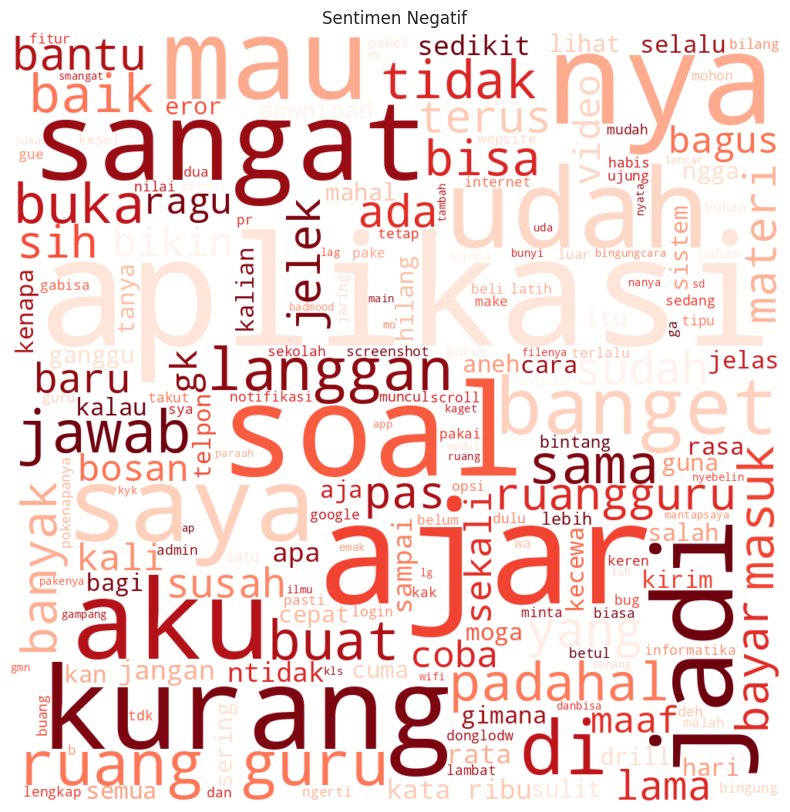

In [39]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

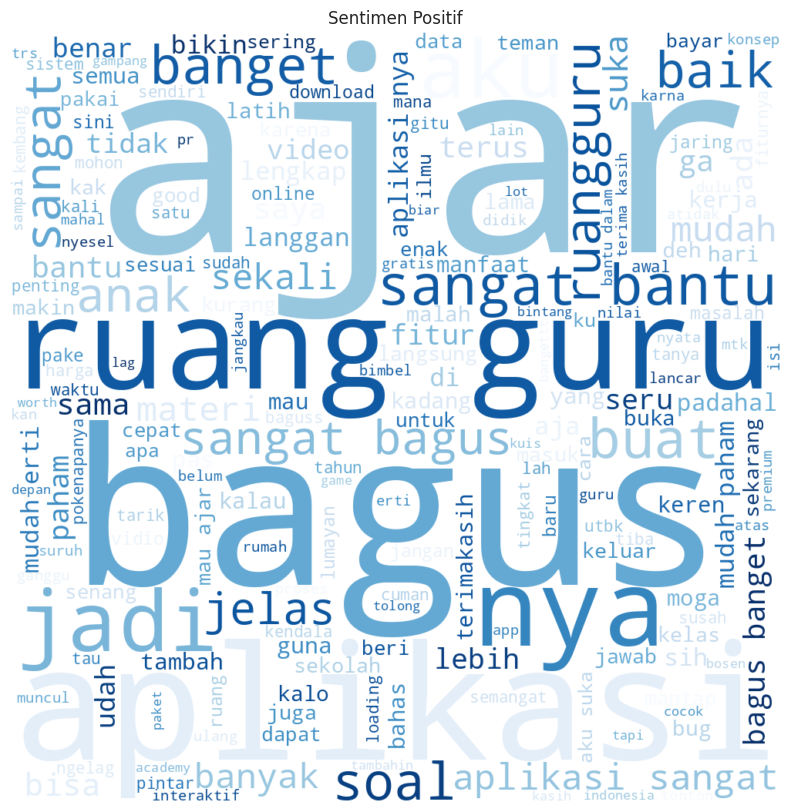

In [40]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [41]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    435
0     68
Name: count, dtype: int64

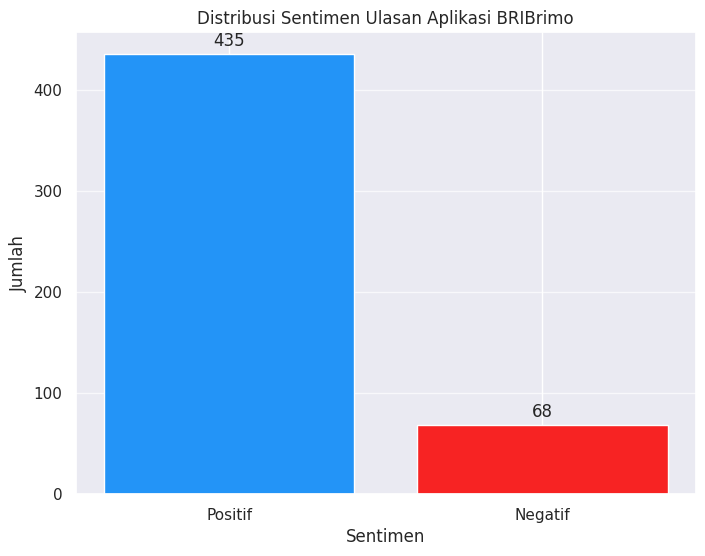

In [42]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi BRIBrimo")

# **Data Preparation & Modeling**

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [44]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
X_train

604                        seru banyak jawab les beneran
31                                                 bagus
464    sangat suka aplikasi karena semua ajar adad pu...
477                 kecewa berat mamah huuuuuuuuuuuuuuuu
87                                   sangat bantu sekali
                             ...                        
152                            bagus tambah kan main nya
381    aplikasi baguss yang mau pinter ingin cari tau...
497                                buat ku sangat pintar
624                 sangat bantu aplikasi wajib download
148                                          jelas bosan
Name: content, Length: 402, dtype: object

In [46]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
vectorizer.fit(X_train)


CountVectorizer()

In [47]:
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [48]:
X_train_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [49]:
for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_vec, y_train)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.8613861386138614
Akurasi untuk c = 0.05: 0.8613861386138614
Akurasi untuk c = 0.25: 0.8415841584158416
Akurasi untuk c = 0.5: 0.8514851485148515
Akurasi untuk c = 0.75: 0.8712871287128713
Akurasi untuk c = 1: 0.8712871287128713


In [50]:
svm = LinearSVC(C = 1.0)
svm.fit(X_train_vec, y_train)

LinearSVC()

In [51]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.8712871287128713 


In [52]:
y_pred = svm.predict(X_test_vec)
print('Accuracy Of SVM Classfier On Test Set: {:.2f}' .format(svm.score(X_test_vec, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))


Accuracy Of SVM Classfier On Test Set: 0.87
[[ 5  9]
 [ 4 83]]
              precision    recall  f1-score   support

           0       0.56      0.36      0.43        14
           1       0.90      0.95      0.93        87

    accuracy                           0.87       101
   macro avg       0.73      0.66      0.68       101
weighted avg       0.85      0.87      0.86       101



In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])  # Assuming positive class is at index 0

print('\nTrue Negatives (TN) = ', cm[1, 1])  # Assuming negative class is at index 1

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[ 5  9]
 [ 4 83]]

True Positives (TP) =  5

True Negatives (TN) =  83

False Positives (FP) =  9

False Negatives (FN) =  4

Accuracy =  0.8712871287128713


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

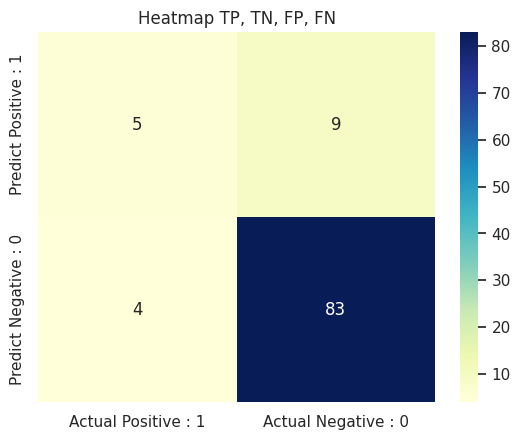

In [54]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive : 1', 'Actual Negative : 0'],
                                 index=['Predict Positive : 1', 'Predict Negative : 0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [55]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [56]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8713


In [57]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1287


# **Testing**


In [59]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = svm.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : jelek banget sering error
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


In [60]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = svm.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : bagus banget buat belajar
Hasil Analisis Sentimen Untuk Teks Baru : Positif
